In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [2]:
results = 'results/'


In [3]:
configlist = []
for f in os.listdir(results):
    with open(os.path.join(results, f, 'config.json'), 'r') as file:
        config = json.load(file)
    config['experiment'] = os.path.join(results, f, 'rewards.csv')
    configlist.append(config)

In [4]:
results = 'results1/'
for f in os.listdir(results):
    with open(os.path.join(results, f, 'config.json'), 'r') as file:
        config = json.load(file)
    config['experiment'] = os.path.join(results, f, 'rewards.csv')
    configlist.append(config)

In [5]:
results = 'results2/'
for f in os.listdir(results):
    with open(os.path.join(results, f, 'config.json'), 'r') as file:
        config = json.load(file)
    config['experiment'] = os.path.join(results, f, 'rewards.csv')
    configlist.append(config)

In [6]:
config_df = pd.DataFrame(configlist)

In [7]:
config_df

network      lr  episodes  gamma algorithm           environment  \
0         33  0.0010       300   0.95        ac              cartpole   
1         22  0.0001       300   0.95        ac              cartpole   
2          1  0.0010        10   0.95       dqn  lunarlander-discrete   
3         11  0.0001       300   0.95        ac              cartpole   
4         11  0.0001       200   0.95        ac              cartpole   
..       ...     ...       ...    ...       ...                   ...   
219        2  0.0001       600   0.90       dqn              cartpole   
220        1  0.0001       600   0.80       dqn  lunarlander-discrete   
221        1  0.0100       300   0.90       dqn  lunarlander-discrete   
222        1  0.0001       300   0.95       dqn  lunarlander-discrete   
223        1  0.0100       300   0.80       dqn  lunarlander-discrete   

                                    experiment  
0     results/experiment_BVHXX2TOB/rewards.csv  
1     results/experiment_RfO6AxzMO/rewards.csv  
2     results/experiment_NakH5qIUg/rewards.csv  
3     results/experiment_YStQowR6r/rewards.csv  
4     results/experiment_19BX8wNpV/rewards.csv  
..                                         ...  
219  results2/experiment_IK7Mgzyka/rewards.csv  
220  results2/experiment_Zat2wNaZn/rewards.csv  
221  results2/experiment_wZrkyIO4K/rewards.csv  
222  results2/experiment_lrcwVSluG/rewards.csv  
223  results2/experiment_sFsqC9ftj/rewards.csv  

[224 rows x 7 columns]

In [8]:
algo = 'dqn'

In [10]:
# config_df[(if algo config_df['algorithm'] == algo)
#           &(config_df['environment'].str.contains('lunar'))
#          &(config_df['episodes'] == 300)
#          &(config_df['lr'] == 0.0001)
#           &((config_df['network'] == 1))]

In [11]:
def slicer(df, algorithm = None, network=None, lr=None, episodes=None, gamma=None, environment=None, experiment=None):
    
    if algorithm:
        df = df[df['algorithm'] == algorithm]
    if network:
        df = df[df['network'] == network]
    if lr:
        df = df[df['lr'] == lr]
    if episodes:
        df = df[df['episodes'] == episodes]
    if gamma:
        df = df[df['gamma'] == gamma]
    if environment:
        df = df[df['environment'].str.contains(environment)]
    if experiment:
        df = df[df['experiment'] == experiment]
        
    return df

In [19]:

slicer(config_df, gamma = 0.99)

network     lr  episodes  gamma algorithm environment  \
11        11  0.001      1000   0.99        ac    cartpole   
47        11  0.010       300   0.99        ac    cartpole   
91        11  0.001      1000   0.99        ac    cartpole   
139       11  0.010       300   0.99        ac    cartpole   

                                    experiment  
11    results/experiment_4qwZMP8nQ/rewards.csv  
47    results/experiment_Tf7ZbbjXk/rewards.csv  
91   results1/experiment_4qwZMP8nQ/rewards.csv  
139  results1/experiment_Tf7ZbbjXk/rewards.csv

In [17]:
slicer(config_df, episodes = 800, algorithm='ac', network = a11, lr = 0.0001)

network      lr  episodes  gamma algorithm  environment  \
14       11  0.0001       800    0.8        ac  lunarlander   
22       11  0.0001       800    0.9        ac  lunarlander   

                                  experiment  
14  results/experiment_bmex7DTb2/rewards.csv  
22  results/experiment_uY4aPjyaq/rewards.csv

In [30]:
def slice_plotter(df, episode_preference = 300, 
                  prefered_label = 'experiment', 
                  filter_thresh = 0, 
                  average = True):
    #extract all prefered slices
    df = df[df['episodes'] == episode_preference]
    
    for index, row in df.iterrows():
        data = pd.read_csv(row['experiment'])
#         print(data)
        if average:
            data['rewards'] = data['rewards'].rolling(10).mean()
            print(data)
#         if len(data[data['rewards'] < 0]) / len(data) < filter_thresh:
        plt.plot(data['episodes'], data['rewards'], label = row[prefered_label])
#     plt.legend()
    plt.show()

     episodes  rewards
0           0      NaN
1           1      NaN
2           2      NaN
3           3      NaN
4           4      NaN
..        ...      ...
295       295     66.1
296       296     64.1
297       297     64.9
298       298     66.4
299       299     69.3

[300 rows x 2 columns]
     episodes  rewards
0           0      NaN
1           1      NaN
2           2      NaN
3           3      NaN
4           4      NaN
..        ...      ...
295       295     66.1
296       296     64.1
297       297     64.9
298       298     66.4
299       299     69.3

[300 rows x 2 columns]


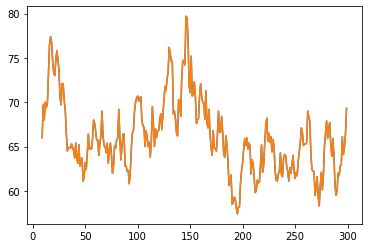

In [31]:
slice_plotter(slicer(config_df, gamma = 0.99))

In [35]:
config_df[(config_df['algorithm'] == 'ddqn') & (config_df['environment'].str.contains('lunar'))]


network      lr  episodes  gamma algorithm  environment  \
6        11  0.0001       300   0.95      ddqn  lunarlander   
8        11  0.0001       300   0.90      ddqn  lunarlander   
26       22  0.0001       300   0.80      ddqn  lunarlander   
28       22  0.0100       300   0.95      ddqn  lunarlander   
34       11  0.0100       300   0.90      ddqn  lunarlander   
38       22  0.0100       300   0.90      ddqn  lunarlander   
39       22  0.0001       300   0.95      ddqn  lunarlander   
40       22  0.0001       300   0.90      ddqn  lunarlander   
46       22  0.0010       300   0.80      ddqn  lunarlander   
51       11  0.0010       300   0.90      ddqn  lunarlander   
59       11  0.0100       300   0.80      ddqn  lunarlander   
61       22  0.0010       300   0.95      ddqn  lunarlander   
64       11  0.0010       300   0.95      ddqn  lunarlander   
66       22  0.0100       300   0.80      ddqn  lunarlander   

                                  experiment  
6   results/experiment_Gi9dZz7bu/rewards.csv  
8   results/experiment_sQMx60qSZ/rewards.csv  
26  results/experiment_TshHf1Nr7/rewards.csv  
28  results/experiment_K0Mu3Riaa/rewards.csv  
34  results/experiment_adNILp1WA/rewards.csv  
38  results/experiment_3TTXJcJPF/rewards.csv  
39  results/experiment_1yw1zNPMo/rewards.csv  
40  results/experiment_t4f1QAzB0/rewards.csv  
46  results/experiment_P5kzSBcsO/rewards.csv  
51  results/experiment_MsonshrWf/rewards.csv  
59  results/experiment_wDlkkYAMQ/rewards.csv  
61  results/experiment_1ZbBYqSCO/rewards.csv  
64  results/experiment_VqNefUJiZ/rewards.csv  
66  results/experiment_MhTFaPDcH/rewards.csv